In [67]:
%matplotlib inline

import numpy as np
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier(
'C:/Users/Paola Mariscal/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
'C:/Users/Paola Mariscal/anaconda3/Lib/site-packages/cv2/data/haarcascade_eye.xml')
smile_cascade =cv2.CascadeClassifier(
'C:/Users/Paola Mariscal/anaconda3/Lib/site-packages/cv2/data/haarcascade_smile.xml')

img = cv2.imread('C:/Users/Paola Mariscal/Downloads/sonrisas.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


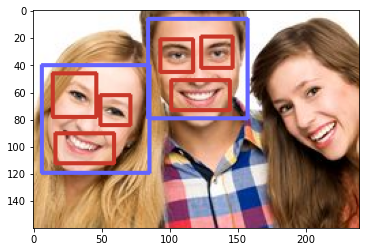

In [68]:
faces = face_cascade.detectMultiScale(gray, 1.10, 5)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,100,100),2) #dibuja el rectangulo en la cara
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    smile = smile_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(40,55,200),2)
    for (sx,sy,sw,sh) in smile:
        cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(40,55,200),2)

        
im2 = img.copy()
im2[:, :, 0] = img[:, :, 2]
im2[:, :, 2] = img[:, :, 0]
plt.imshow(im2)
plt.show()


#cv2.imshow('img',img)
#cv2.imwrite('img.jpg',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [70]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

faceClassif = cv2.CascadeClassifier('C:/Users/Paola Mariscal/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
'C:/Users/Paola Mariscal/anaconda3/Lib/site-packages/cv2/data/haarcascade_eye.xml')
smile_cascade =cv2.CascadeClassifier(
'C:/Users/Paola Mariscal/anaconda3/Lib/site-packages/cv2/data/haarcascade_smile.xml')

while True:
	ret,frame = cap.read()
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

	faces = faceClassif.detectMultiScale(gray, 1.1, 10)

	for (x,y,w,h) in faces:
		img=cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
		roi_gray = gray[y:y+h, x:x+w]
		roi_color = img[y:y+h, x:x+w]        
		eyes = eye_cascade.detectMultiScale(roi_gray, 1.8, 10)
		smile = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
		for (ex,ey,ew,eh) in eyes:
			cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)  
			#cv2.circle(roi_color, (ex+ew,ey), 20, (0,0,255),2)
		for (sx,sy,sw,sh) in smile:        
			cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(255, 0, 0),2)        
        
     
	cv2.imshow('frame',frame)
	
	if cv2.waitKey(1) & 0xFF == ord('q'):
		break
cap.release()
cv2.destroyAllWindows()